In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tools.eval_measures import mse, rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [4]:
# 전처리한 데이터 불러오기
df=pd.read_csv('/Users/tony_sung/DS/data/combined_train_test_filled_cleansed.csv', index_col='ymdhm', parse_dates=['ymdhm'])
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [5]:
# fw_1018680는 원래 없는 자료이므로 삭제
df.drop('fw_1018680', axis=1, inplace=True)

In [6]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.037573,345.631700,329.232797,746.826551,316.071760,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317316,174.250734,76.559900,1077.388189,67.495669,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,0.000000,39.000000,259.700000,243.290000,246.200000,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


# log 변환

In [7]:
from tqdm import tqdm

100%|██████████| 4/4 [00:05<00:00,  1.35s/it]
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


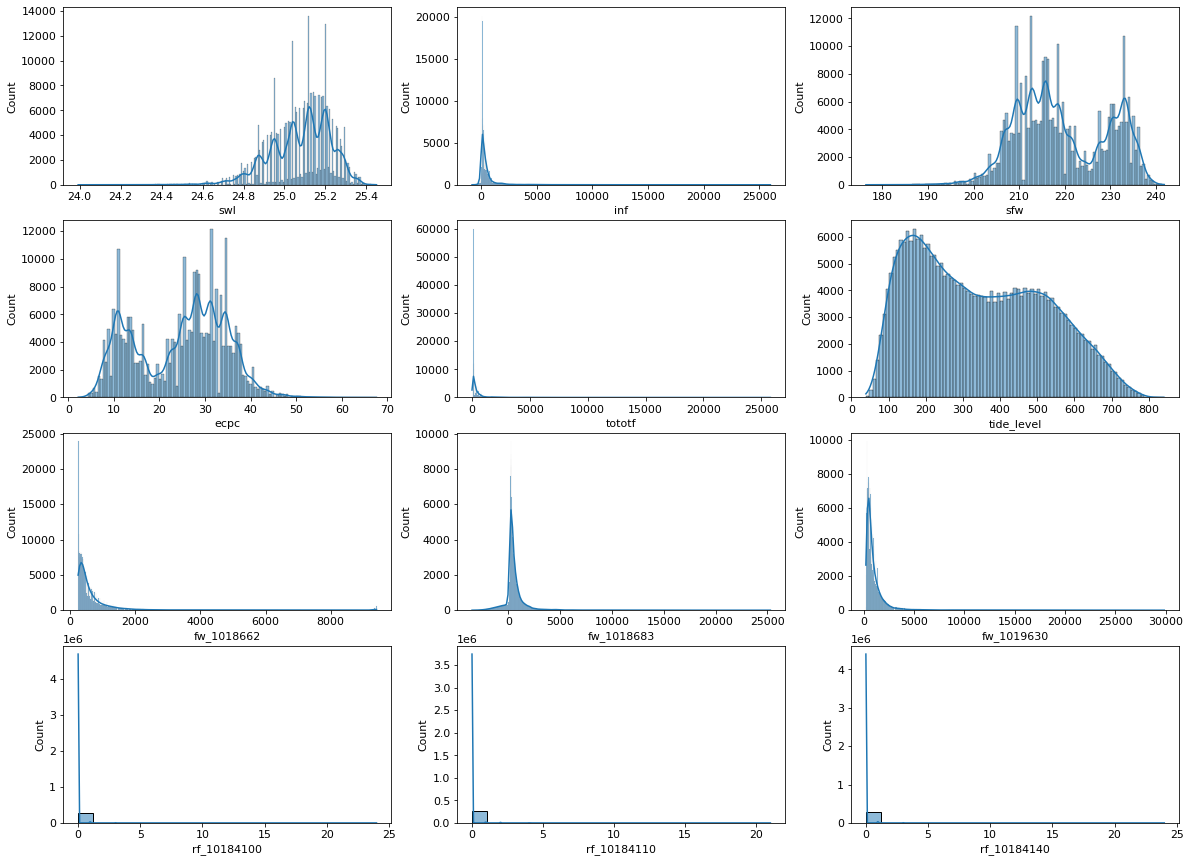

In [8]:
# 로그변환 안한 분포

y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

In [9]:
y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

df_log=pd.DataFrame.copy(df)
df_log=df_log.drop(y_cols, axis=1)

# 전체 상용로그변환 (x-min(x)+1) 변환
for i in range(len(x_cols)):
    df_log[x_cols[i]]=np.log10(df_log[x_cols[i]]-min(df_log[x_cols[i]])+1)

100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


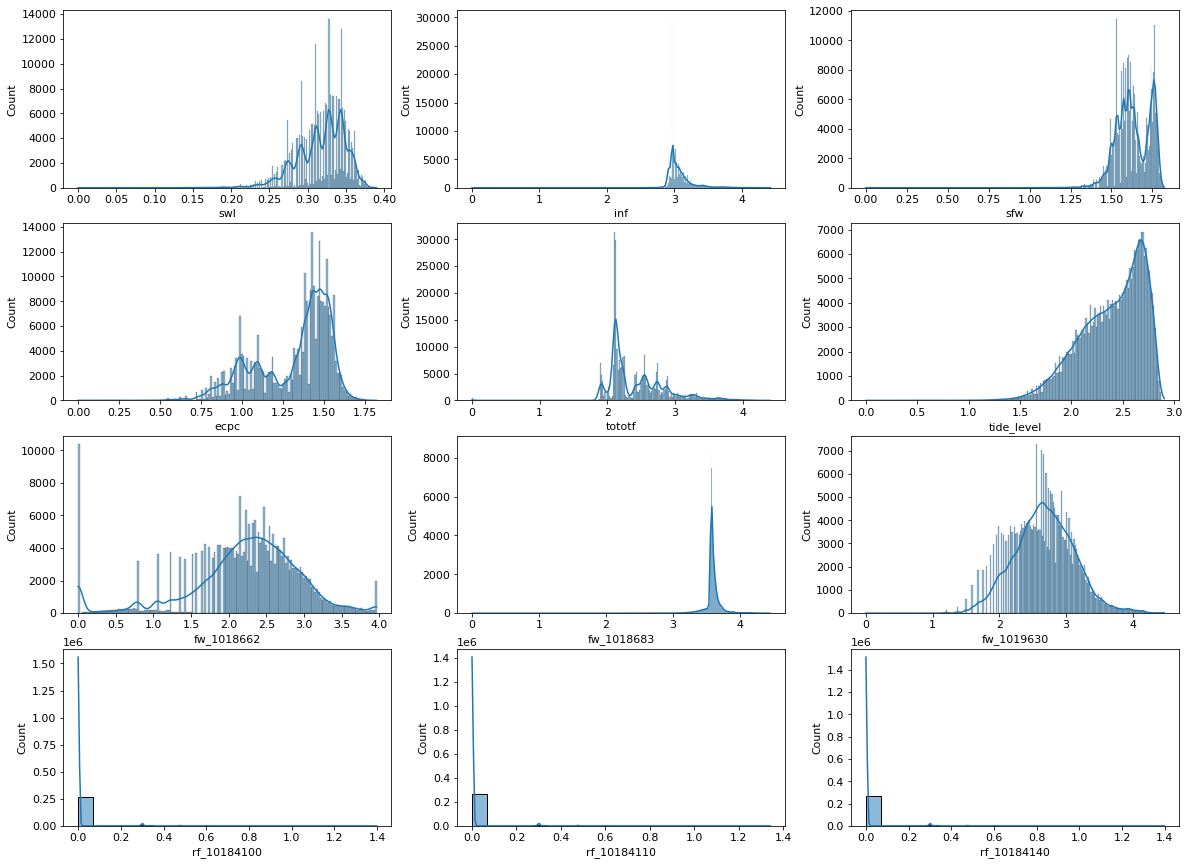

In [10]:
# 변환한 분포 그래프  확인
fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df_log, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

# StandardScale

In [11]:
# from sklearn.preprocessing import StandardScaler

In [12]:
# sub = pd.read_csv('/Users/tony_sung/DS/data/sample_submission.csv',index_col=0)
# sub.columns

In [13]:
# scaler = StandardScaler()
# X_train = X.loc[:'2022-05-31 23:50:00',:]
# X_train

# 변수 적합성 파악

## Granger causality

In [14]:
# def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=5):

#     """Check Granger Causality of all possible combinations of the Time series.
#     The rows are the response variable, columns are predictors.

#     data      : pandas dataframe containing the time series variables
#     variables : list containing names of the time series variables.
#     """
#     df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)

#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

In [15]:
df_gc=df[y_cols].merge(df_log, on='ymdhm')
df_gc.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3,0.256958,3.134655,1.640382,1.376212,2.745075,2.609594,2.355566,3.628747,2.517381,0.0,0.0,0.0
2012-05-01 00:10:00,314.7,300.2,290.0,275.3,0.255514,3.104863,1.638290,1.380211,2.751202,2.613842,2.407748,3.628919,2.517381,0.0,0.0,0.0
2012-05-01 00:20:00,313.7,301.2,290.0,275.3,0.254306,3.109444,1.636588,1.383097,2.761477,2.615950,2.395134,3.628402,2.517381,0.0,0.0,0.0
2012-05-01 00:30:00,311.7,301.2,290.0,276.3,0.254306,3.104931,1.636588,1.383097,2.751356,2.617000,2.369067,3.628402,2.532920,0.0,0.0,0.0
2012-05-01 00:40:00,311.7,301.2,291.0,277.3,0.254306,3.109444,1.636588,1.383097,2.761477,2.614897,2.369067,3.626431,2.548082,0.0,0.0,0.0


In [16]:
# grangers_causation_matrix(df_gc, variables=df_gc.columns)

## 다중공선성(VIF)
- X변수들 간 비교

In [17]:
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

In [18]:
vif=feature_engineering_XbyVIF(df_log)
print(vif)

     VIF_Factor      Feature
0    312.689641          swl
1   1431.420095          inf
2   1168.802655          sfw
3     95.222016         ecpc
4    140.225381       tototf
5     65.448356   tide_level
6     46.018933   fw_1018662
7   1619.445958   fw_1018683
8    191.786899   fw_1019630
9      1.441508  rf_10184100
10     1.466831  rf_10184110
11     1.597302  rf_10184140


In [19]:
vif=feature_engineering_XbyVIF(df_log.drop('inf',axis=1))
print(vif)

     VIF_Factor      Feature
0    312.642865          swl
1   1153.559528          sfw
2     93.192692         ecpc
3     74.878437       tototf
4     64.588002   tide_level
5     45.211044   fw_1018662
6   1181.224681   fw_1018683
7    180.631163   fw_1019630
8      1.441315  rf_10184100
9      1.466396  rf_10184110
10     1.597194  rf_10184140


In [20]:
vif=feature_engineering_XbyVIF(df_log.drop(['inf','sfw'],axis=1))
print(vif)

   VIF_Factor      Feature
0  155.288922          swl
1   52.170467         ecpc
2   71.402666       tototf
3   60.048087   tide_level
4   45.106617   fw_1018662
5  462.069564   fw_1018683
6  179.735972   fw_1019630
7    1.441314  rf_10184100
8    1.466273  rf_10184110
9    1.597139  rf_10184140


In [21]:
vif = feature_engineering_XbyVIF(df_log.drop(['inf', 'sfw', 'fw_1018683'], axis=1))
print(vif)

   VIF_Factor      Feature
0   47.739621          swl
1   29.778153         ecpc
2   52.613550       tototf
3   58.499421   tide_level
4   44.985571   fw_1018662
5  178.029813   fw_1019630
6    1.440984  rf_10184100
7    1.465443  rf_10184110
8    1.596778  rf_10184140


# Train-Test

In [22]:
df_scaled=pd.concat([df_log,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.343802,3.189732,1.636989,1.382377,2.098159,1.633468,1.979321,3.547000,2.415040,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.343802,2.969872,1.636989,1.382377,2.098575,1.531479,2.006038,3.564530,2.356580,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.343802,2.969742,1.636989,1.382377,2.097604,1.414973,1.979321,3.574717,2.314141,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.343802,2.969812,1.636989,1.382377,2.098124,1.301030,1.951143,3.582793,2.291702,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.341830,2.907680,1.633266,1.388989,2.098367,1.301030,1.889582,3.587008,2.314141,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


# 최적 하이퍼파라미터 p 찾기
- AIC를 제일 작게 하는 p

In [22]:
# # grid-search
# r_min=60
# r_max=200
# step=20

# model=VAR(df_train) # 학습데이터
# results_aic=[]
# for p in tqdm(range(r_min,r_max+1,step)):
#   results=model.fit(p)
#   results_aic.append(results.aic)

# # order p와 AIC 시각화
# sns.set()
# plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
# plt.xlabel("Order")
# plt.ylabel("AIC")
# plt.show()

# # AIC를 최소로 만드는 p
# min_aic=min(results_aic)
# p=r_min+step*results_aic.index(min_aic)
# print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

In [27]:
# # grid-search
# r_min=150
# r_max=170
# step=1

# model=VAR(df_train) # 학습데이터
# results_aic=[]
# for p in tqdm(range(r_min,r_max+1,step)):
#   results=model.fit(p)
#   results_aic.append(results.aic)

# # order p와 AIC 시각화
# sns.set()
# plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
# plt.xlabel("Order")
# plt.ylabel("AIC")
# plt.show()

# # AIC를 최소로 만드는 p
# min_aic=min(results_aic)
# p=r_min+step*results_aic.index(min_aic)
# print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

=> AIC가 완만해지기 시작하는 158~163 구간을 최적 p로 계산해보기

In [28]:
# # grid-search
# r_min=200
# r_max=250
# step=10

# model=VAR(df_train) # 학습데이터
# results_aic=[]
# for p in tqdm(range(r_min,r_max+1,step)):
#   results=model.fit(p)
#   results_aic.append(results.aic)

# # order p와 AIC 시각화
# sns.set()
# plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
# plt.xlabel("Order")
# plt.ylabel("AIC")
# plt.show()

# # AIC를 최소로 만드는 p
# min_aic=min(results_aic)
# p=r_min+step*results_aic.index(min_aic)
# print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

In [29]:
# # grid-search
# r_min=225
# r_max=235
# step=1

# model=VAR(df_train) # 학습데이터
# results_aic=[]
# for p in tqdm(range(r_min,r_max+1,step)):
#   results=model.fit(p)
#   results_aic.append(results.aic)

# # order p와 AIC 시각화
# sns.set()
# plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
# plt.xlabel("Order")
# plt.ylabel("AIC")
# plt.show()

# # AIC를 최소로 만드는 p
# min_aic=min(results_aic)
# p=r_min+step*results_aic.index(min_aic)
# print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

# 모델링

In [30]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 모델 학습 및 y 예측값 df 입력
from tqdm import tqdm

def get_fc_ys(lag, df_train, df_tt, df_fc):
    # 모델 학습
    lag=lag
    var=VAR(df_train)
    fitted_var=var.fit(lag)
    for i in tqdm(range(6912)):
      # df_tt에서 예측하려는 시간 직전 lag개 데이터 가져오기
      forecast_input=df_tt.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)
      # 바로 다음 step 1개 예측
      fc=fitted_var.forecast(y=forecast_input, steps=1)
      # df_fc에 예측한 wl 결과값 추가하기
      y_cols=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
      for name in y_cols:
        col_idx=list(df_fc.columns).index(name)
        df_fc.iloc[4464+i,col_idx]=fc[0][col_idx]
    return df_fc

In [32]:
from sklearn.metrics import r2_score
def get_r2_score(pred,label):
    r2_list = []
    for i in range(4):
        p = pred[:,i]
        l = label[:,i]
        r2_s = r2_score(l,p)
        r2_list.append(r2_s)
    return np.mean(r2_list)

## var(232)

In [28]:
df_forecast157=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast157=df_forecast157.loc['2022-06':,y_cols]
df_forecast157

100%|██████████| 6912/6912 [00:03<00:00, 2140.58it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


In [29]:
# 예측한 데이터
df_submission=df_forecast157
submission_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.193929131118233
RMSE/R2 score : 1.1942273352238062


## var(158)

In [42]:
df_forecast158=get_fc_ys(158,df_train,df_tt,df_forecast)
df_forecast158=df_forecast158.loc['2022-06':,y_cols]
df_forecast158

100%|██████████| 6912/6912 [00:03<00:00, 1820.55it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.109383,277.281404,274.814818,269.323057
2022-06-01 00:10:00,280.911322,276.019591,273.43168,267.803722
2022-06-01 00:20:00,282.861372,276.683673,273.234726,264.813677
2022-06-01 00:30:00,285.852192,277.540188,273.655089,261.388985
2022-06-01 00:40:00,285.878639,277.982623,273.790996,258.469473
...,...,...,...,...
2022-07-18 23:10:00,288.576897,293.77227,297.720107,306.745781
2022-07-18 23:20:00,290.332613,302.66713,305.251183,308.611163
2022-07-18 23:30:00,295.842193,307.078579,307.782642,310.171247


In [43]:
# 예측한 데이터
df_submission=df_forecast158
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1929020549581884
RMSE/R2 score : 1.1931999262625692


## var(159)

In [44]:
df_forecast159=get_fc_ys(159,df_train,df_tt,df_forecast)
df_forecast159=df_forecast159.loc['2022-06':,y_cols]
df_forecast159

100%|██████████| 6912/6912 [00:03<00:00, 1868.44it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.084303,277.310143,274.814101,269.327572
2022-06-01 00:10:00,280.904667,276.037278,273.463699,267.763005
2022-06-01 00:20:00,282.867419,276.697195,273.245377,264.77824
2022-06-01 00:30:00,285.828164,277.516583,273.637019,261.433267
2022-06-01 00:40:00,285.858348,277.964988,273.774172,258.485362
...,...,...,...,...
2022-07-18 23:10:00,288.570681,293.795269,297.751772,306.761755
2022-07-18 23:20:00,290.359506,302.651279,305.248334,308.655434
2022-07-18 23:30:00,295.850801,307.109564,307.796734,310.155191


In [45]:
# 예측한 데이터
df_submission=df_forecast159
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1922724379162135
RMSE/R2 score : 1.1925698290956905


## var(160)

In [46]:
df_forecast160=get_fc_ys(160,df_train,df_tt,df_forecast)
df_forecast160=df_forecast160.loc['2022-06':,y_cols]
df_forecast160

100%|██████████| 6912/6912 [00:03<00:00, 1929.64it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.076679,277.299026,274.829438,269.296565
2022-06-01 00:10:00,280.910622,276.060372,273.468005,267.780121
2022-06-01 00:20:00,282.877784,276.700463,273.282162,264.753312
2022-06-01 00:30:00,285.840854,277.511348,273.641532,261.43401
2022-06-01 00:40:00,285.855081,277.979367,273.7699,258.500832
...,...,...,...,...
2022-07-18 23:10:00,288.589587,293.811759,297.778119,306.7575
2022-07-18 23:20:00,290.375008,302.665871,305.266733,308.668551
2022-07-18 23:30:00,295.856688,307.105585,307.786559,310.170355


In [47]:
# 예측한 데이터
df_submission=df_forecast160
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1922611297027401
RMSE/R2 score : 1.1925584859602423


## var(161)

In [48]:
df_forecast161=get_fc_ys(161,df_train,df_tt,df_forecast)
df_forecast161=df_forecast161.loc['2022-06':,y_cols]
df_forecast161

100%|██████████| 6912/6912 [00:03<00:00, 1910.64it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.089332,277.299154,274.836592,269.303752
2022-06-01 00:10:00,280.913237,276.044703,273.476891,267.745655
2022-06-01 00:20:00,282.878486,276.708665,273.283393,264.780506
2022-06-01 00:30:00,285.844338,277.509603,273.636286,261.399726
2022-06-01 00:40:00,285.860431,277.999678,273.801367,258.480552
...,...,...,...,...
2022-07-18 23:10:00,288.595635,293.809539,297.770448,306.761526
2022-07-18 23:20:00,290.385042,302.659209,305.267184,308.667083
2022-07-18 23:30:00,295.875371,307.110968,307.802261,310.181153


In [49]:
# 예측한 데이터
df_submission=df_forecast161
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.192577220719513
RMSE/R2 score : 1.1928748496348096


## var(162)

In [50]:
df_forecast162=get_fc_ys(162,df_train,df_tt,df_forecast)
df_forecast162=df_forecast162.loc['2022-06':,y_cols]
df_forecast162

100%|██████████| 6912/6912 [00:03<00:00, 1880.58it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.089956,277.312842,274.827942,269.31505
2022-06-01 00:10:00,280.928037,276.054499,273.474106,267.745592
2022-06-01 00:20:00,282.880297,276.699651,273.303459,264.75143
2022-06-01 00:30:00,285.840563,277.51523,273.640011,261.412944
2022-06-01 00:40:00,285.859967,278.000695,273.861067,258.451615
...,...,...,...,...
2022-07-18 23:10:00,288.606709,293.821898,297.772526,306.768415
2022-07-18 23:20:00,290.38686,302.663485,305.252561,308.667795
2022-07-18 23:30:00,295.884221,307.117072,307.817581,310.180442


In [51]:
# 예측한 데이터
df_submission=df_forecast162
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.192867089840499
RMSE/R2 score : 1.1931649482954982


## var(163)

In [52]:
df_forecast163=get_fc_ys(163,df_train,df_tt,df_forecast)
df_forecast163=df_forecast163.loc['2022-06':,y_cols]
df_forecast163

100%|██████████| 6912/6912 [00:03<00:00, 1885.11it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.082409,277.31871,274.825013,269.316783
2022-06-01 00:10:00,280.939604,276.054808,273.464513,267.784652
2022-06-01 00:20:00,282.888293,276.707472,273.312669,264.766839
2022-06-01 00:30:00,285.82606,277.502615,273.64483,261.38926
2022-06-01 00:40:00,285.855453,278.016656,273.867642,258.47836
...,...,...,...,...
2022-07-18 23:10:00,288.609474,293.816693,297.76266,306.760855
2022-07-18 23:20:00,290.393896,302.657948,305.241702,308.664706
2022-07-18 23:30:00,295.895408,307.120455,307.811152,310.19082


In [53]:
# 예측한 데이터
df_submission=df_forecast163
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1930309531706083
RMSE/R2 score : 1.1933289414542836


## var(232)

In [35]:
df_forecast232=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:05<00:00, 1358.57it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


In [36]:
# 예측한 데이터
df_submission=df_forecast232
submission_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1939291311381304
RMSE/R2 score : 1.194227335243716


# inf, sfw 제외 모델

In [33]:
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

In [30]:
# grid-search
r_min=150
r_max=170
step=1

model=VAR(df_train2) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

  0%|          | 0/21 [00:00<?, ?it/s]

=> p 최적값 : 157~163

## var(157)

In [15]:
df_forecast157_1=get_fc_ys(157,df_train2,df_tt2,df_forecast2)
df_forecast157_1=df_forecast157_1.loc['2022-06':,y_cols]
df_forecast157_1

100%|██████████| 6912/6912 [00:04<00:00, 1643.20it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.887482,277.354925,274.819996,269.414079
2022-06-01 00:10:00,280.956641,276.100968,273.498598,267.603865
2022-06-01 00:20:00,282.884068,276.620744,273.263478,264.825112
2022-06-01 00:30:00,285.38666,277.462741,273.555804,261.326637
2022-06-01 00:40:00,286.054691,277.954603,273.788879,258.479998
...,...,...,...,...
2022-07-18 23:10:00,288.507333,293.643563,297.668465,306.663951
2022-07-18 23:20:00,290.202145,302.627448,305.143233,308.713644
2022-07-18 23:30:00,295.729824,307.103263,307.832465,310.095916


In [16]:
# 예측한 데이터
df_submission=df_forecast157_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1869484977590998
RMSE/R2 score : 1.187241779137677


## var(158)

In [17]:
df_forecast158_1=get_fc_ys(158,df_train2,df_tt2,df_forecast2)
df_forecast158_1=df_forecast158_1.loc['2022-06':,y_cols]
df_forecast158_1

100%|██████████| 6912/6912 [00:04<00:00, 1668.49it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.92054,277.378418,274.847064,269.364599
2022-06-01 00:10:00,280.954411,276.095941,273.502219,267.572655
2022-06-01 00:20:00,282.862823,276.613644,273.286832,264.834604
2022-06-01 00:30:00,285.375927,277.447386,273.529777,261.329318
2022-06-01 00:40:00,286.055774,277.978284,273.828408,258.503312
...,...,...,...,...
2022-07-18 23:10:00,288.516767,293.632926,297.69975,306.729382
2022-07-18 23:20:00,290.211954,302.650645,305.13419,308.733954
2022-07-18 23:30:00,295.720849,307.123019,307.847397,310.062506


In [18]:
# 예측한 데이터
df_submission=df_forecast158_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1864985470053517
RMSE/R2 score : 1.1867914820222083


## var(159)

In [19]:
df_forecast159_1=get_fc_ys(159,df_train2,df_tt2,df_forecast2)
df_forecast159_1=df_forecast159_1.loc['2022-06':,y_cols]
df_forecast159_1

100%|██████████| 6912/6912 [00:04<00:00, 1708.30it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.895786,277.403282,274.851901,269.373218
2022-06-01 00:10:00,280.95347,276.114663,273.530375,267.533681
2022-06-01 00:20:00,282.856328,276.608422,273.289224,264.816044
2022-06-01 00:30:00,285.355928,277.445098,273.521794,261.356927
2022-06-01 00:40:00,286.042117,277.962888,273.802847,258.512317
...,...,...,...,...
2022-07-18 23:10:00,288.511061,293.652481,297.723454,306.744184
2022-07-18 23:20:00,290.234112,302.635074,305.137562,308.78131
2022-07-18 23:30:00,295.734186,307.152764,307.857032,310.05093


In [20]:
# 예측한 데이터
df_submission=df_forecast159_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1859269154112735
RMSE/R2 score : 1.186219428862763


## var(160)

In [21]:
df_forecast160_1=get_fc_ys(160,df_train2,df_tt2,df_forecast2)
df_forecast160_1=df_forecast160_1.loc['2022-06':,y_cols]
df_forecast160_1

100%|██████████| 6912/6912 [00:03<00:00, 1780.21it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.897109,277.391226,274.867957,269.340291
2022-06-01 00:10:00,280.959601,276.133242,273.53619,267.547478
2022-06-01 00:20:00,282.870973,276.62223,273.32635,264.788868
2022-06-01 00:30:00,285.351256,277.443863,273.525262,261.346991
2022-06-01 00:40:00,286.049965,277.973132,273.80413,258.542427
...,...,...,...,...
2022-07-18 23:10:00,288.533255,293.67439,297.756057,306.745581
2022-07-18 23:20:00,290.249951,302.647304,305.147671,308.790993
2022-07-18 23:30:00,295.736304,307.147482,307.855513,310.067378


In [22]:
# 예측한 데이터
df_submission=df_forecast160_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1859174206621097
RMSE/R2 score : 1.1862098968411539


## var(161)

In [23]:
df_forecast161_1=get_fc_ys(161,df_train2,df_tt2,df_forecast2)
df_forecast161_1=df_forecast161_1.loc['2022-06':,y_cols]
df_forecast161_1

100%|██████████| 6912/6912 [00:03<00:00, 1771.83it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.910347,277.390579,274.874302,269.346628
2022-06-01 00:10:00,280.965756,276.12528,273.549235,267.5063
2022-06-01 00:20:00,282.874989,276.63202,273.317717,264.811704
2022-06-01 00:30:00,285.347376,277.430664,273.528148,261.322349
2022-06-01 00:40:00,286.044747,277.968236,273.831482,258.529343
...,...,...,...,...
2022-07-18 23:10:00,288.539227,293.67354,297.747005,306.750062
2022-07-18 23:20:00,290.262512,302.642071,305.15316,308.791968
2022-07-18 23:30:00,295.75255,307.152,307.873085,310.076315


In [24]:
# 예측한 데이터
df_submission=df_forecast161_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1861261830229204
RMSE/R2 score : 1.1864188544020466


## var(162)

In [25]:
df_forecast162_1=get_fc_ys(162,df_train2,df_tt2,df_forecast2)
df_forecast162_1=df_forecast162_1.loc['2022-06':,y_cols]
df_forecast162_1

100%|██████████| 6912/6912 [00:03<00:00, 1750.94it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.914556,277.401696,274.847573,269.367011
2022-06-01 00:10:00,280.979603,276.133222,273.550993,267.507369
2022-06-01 00:20:00,282.876086,276.620757,273.338354,264.77236
2022-06-01 00:30:00,285.346348,277.443666,273.550467,261.328055
2022-06-01 00:40:00,286.044123,277.963943,273.865044,258.516193
...,...,...,...,...
2022-07-18 23:10:00,288.55205,293.687435,297.739559,306.761881
2022-07-18 23:20:00,290.26485,302.647409,305.137623,308.79305
2022-07-18 23:30:00,295.761896,307.158445,307.88296,310.076817


In [26]:
# 예측한 데이터
df_submission=df_forecast162_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1864336015082184
RMSE/R2 score : 1.186726524587656


## var(163)

In [29]:
df_forecast163_1=get_fc_ys(163,df_train2,df_tt2,df_forecast2)
df_forecast163_1=df_forecast163_1.loc['2022-06':,y_cols]
df_forecast163_1

100%|██████████| 6912/6912 [00:03<00:00, 1745.31it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.910824,277.404881,274.846964,269.368822
2022-06-01 00:10:00,280.99121,276.13887,273.543715,267.545096
2022-06-01 00:20:00,282.881217,276.625715,273.344233,264.790447
2022-06-01 00:30:00,285.337941,277.431501,273.544609,261.291808
2022-06-01 00:40:00,286.044467,277.977677,273.871604,258.542718
...,...,...,...,...
2022-07-18 23:10:00,288.553985,293.680054,297.728106,306.750446
2022-07-18 23:20:00,290.272083,302.644101,305.131202,308.792344
2022-07-18 23:30:00,295.775189,307.161311,307.878948,310.087033


100%|██████████| 6912/6912 [00:04<00:00, 1702.53it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.910824,277.404881,274.846964,269.368822
2022-06-01 00:10:00,280.99121,276.13887,273.543715,267.545096
2022-06-01 00:20:00,282.881217,276.625715,273.344233,264.790447
2022-06-01 00:30:00,285.337941,277.431501,273.544609,261.291808
2022-06-01 00:40:00,286.044467,277.977677,273.871604,258.542718
...,...,...,...,...
2022-07-18 23:10:00,288.553985,293.680054,297.728106,306.750446
2022-07-18 23:20:00,290.272083,302.644101,305.131202,308.792344
2022-07-18 23:30:00,295.775189,307.161311,307.878948,310.087033


100%|██████████| 6912/6912 [00:04<00:00, 1640.00it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.910824,277.404881,274.846964,269.368822
2022-06-01 00:10:00,280.99121,276.13887,273.543715,267.545096
2022-06-01 00:20:00,282.881217,276.625715,273.344233,264.790447
2022-06-01 00:30:00,285.337941,277.431501,273.544609,261.291808
2022-06-01 00:40:00,286.044467,277.977677,273.871604,258.542718
...,...,...,...,...
2022-07-18 23:10:00,288.553985,293.680054,297.728106,306.750446
2022-07-18 23:20:00,290.272083,302.644101,305.131202,308.792344
2022-07-18 23:30:00,295.775189,307.161311,307.878948,310.087033


In [30]:
# 예측한 데이터
df_submission=df_forecast163_1
submission_inv_np=df_submission.values
# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values
# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)
# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1864595769282686
RMSE/R2 score : 1.1867525281393487


## var(232)

In [34]:
df_forecast232_1=get_fc_ys(232,df_train2,df_tt2,df_forecast2)
df_forecast232_1=df_forecast232_1.loc['2022-06':,y_cols]
df_forecast232_1

100%|██████████| 6912/6912 [00:02<00:00, 2700.46it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10:00,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20:00,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30:00,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40:00,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10:00,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20:00,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30:00,295.900694,307.236131,307.898054,310.212295


In [36]:
# 예측한 데이터
df_submission=df_forecast232_1
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1856942372304864
RMSE/R2 score : 1.185986131412822


## var(233)

In [33]:
df_forecast233_1=get_fc_ys(233,df_train2,df_tt2,df_forecast2)
df_forecast233_1=df_forecast233_1.loc['2022-06':,y_cols]
df_forecast233_1

100%|██████████| 6912/6912 [00:05<00:00, 1373.29it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.78996,277.425771,274.757464,269.531514
2022-06-01 00:10:00,281.018859,276.223851,273.531214,267.656006
2022-06-01 00:20:00,282.947854,276.615907,273.382283,264.979415
2022-06-01 00:30:00,285.418453,277.482416,273.677125,261.567808
2022-06-01 00:40:00,286.152558,278.019204,273.940462,258.855426
...,...,...,...,...
2022-07-18 23:10:00,288.645448,293.745765,297.690064,306.372633
2022-07-18 23:20:00,290.199081,302.523913,305.07584,308.101781
2022-07-18 23:30:00,295.912379,307.236417,307.906301,310.238928


In [34]:
# 예측한 데이터
df_submission=df_forecast233_1
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1857219516429451
RMSE/R2 score : 1.1860138417112198


# csv로 저장

In [37]:
fin_submission=df_submission.reset_index(drop=False)
fin_submission['ymdhm']=fin_submission['ymdhm'].dt.strftime('%Y-%m-%d %H:%M')
fin_submission.set_index('ymdhm', inplace=True)

In [38]:
fin_submission

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30,295.900694,307.236131,307.898054,310.212295


In [39]:
fin_submission.to_csv('VAR(232)_logscale.csv')